<img src="./pic/sharif-main-logo.png" alt="SUT logo" width=345 height=345 align=left class="saturate">


<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024<br>
<font color=3C99D size=5>
    Practical Assignment 2 - Unsupervised Learning<br>
<font color=696880 size=4>
    Assignment Supervisor: Niki Sepasian <br>
<font color=696880 size=5>
    Asemaneh Nafe


In [34]:
student_number = "401100325"
full_name = "yashar paymai"
assert student_number and full_name is not None, 'please input your information'

In [35]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

<font color=red size=3>
notice that you can not use sklearn.decomposition and sklearn.cluster libary in this home work! you should implement pca and kmeans from scratch.

## Overview
In this assignment, you will perform PCA and K-Means clustering on credit card customer data. dataset contains information about customer’s use of credit cards. The goal is to reduce the dataset’s dimensionality using PCA and then apply clustering to segment customers. You will compare the clustering performance both before and after PCA. Additionally, you'll be asked to explain the theory and decisions behind each step.

## Data Preprocessing (15 points)
Read the dataset.CSV file and display a few samples.

In [36]:
df = pd.read_csv('dataset.csv')
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Display dataset information.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Which column do you think might be the most irrelevant for PCA and clustering?
<br>
Answer: 
CUST_ID is the most irrelevant column for PCA and clustering because it is just an identifier and does not contain any useful information for clustering or dimensionality reduction.

In [38]:
# Exclude irrelevant feature
df.drop('CUST_ID', axis=1, inplace=True)
df.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


how do you handle missing data, and why did you choose this method?
<br>
Answer: filling missing data with the mean of the column is appropriate in this case , its simple and also does not make much bias in data distribution. approaches like KNN imputation are alo suitable but they are much more complicated and computationally expensive and also needs more expertise to choose the right hyperparameters.


In [39]:
#Fill missing data
df.fillna(df.mean(), inplace=True)

plot the correlation matrix and identify redundant features.remove them from the dataframe.

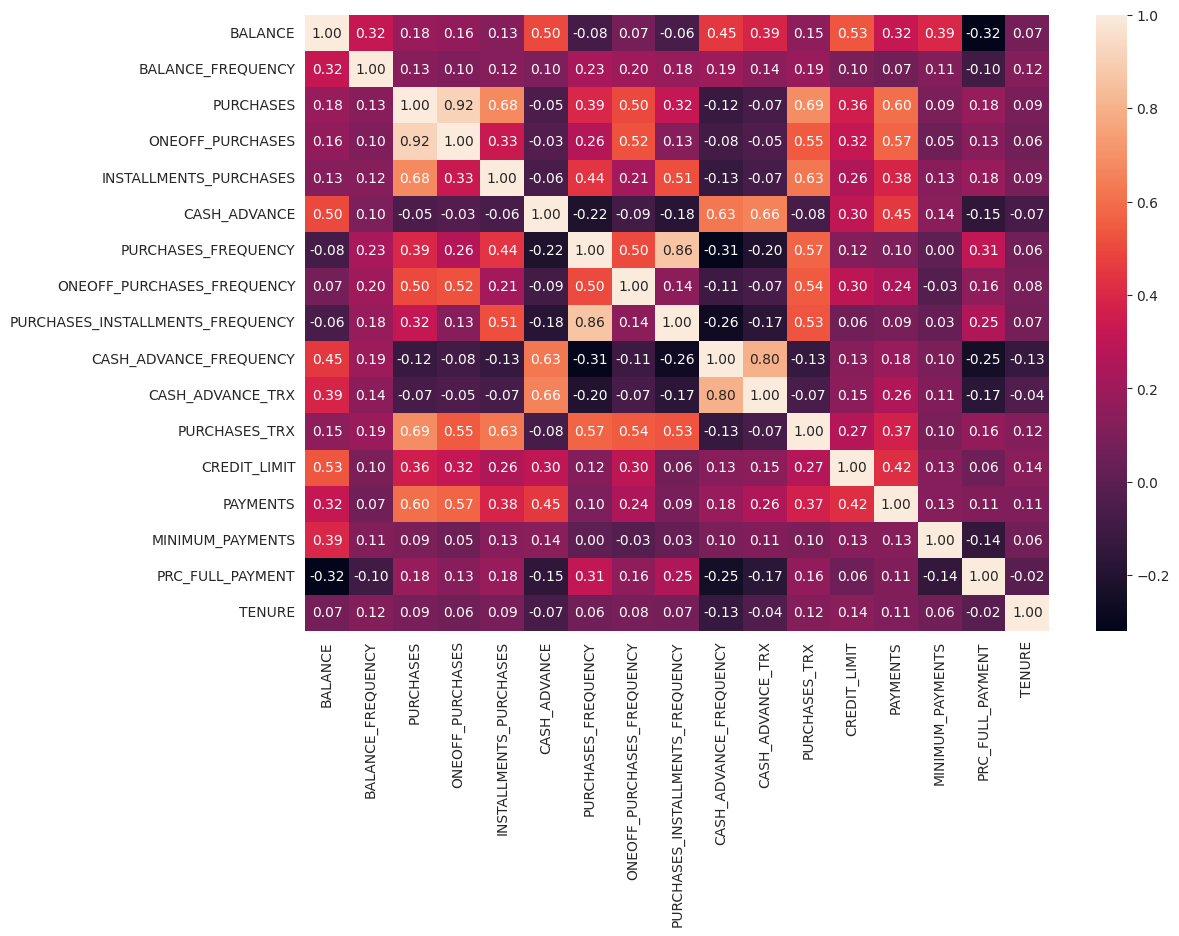

In [40]:
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [41]:
# Identify and remove redundant features. use 0.8 threshold.
redundant_features = []
for i in range(len(df.columns)):
    for j in range(i+1,len(df.columns)):
        if np.abs(df.corr().iloc[i,j])>=0.8:
            print("(",df.columns[i], df.columns[j],"):" , df.corr().iloc[i,j])
            redundant_features.append(df.columns[j])
redundant_features = list(set(redundant_features))
df.drop(redundant_features, axis=1, inplace=True)
print('Redundant features:', redundant_features)


( PURCHASES ONEOFF_PURCHASES ): 0.9168445587151489
( PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY ): 0.8629336372699634
Redundant features: ['PURCHASES_INSTALLMENTS_FREQUENCY', 'ONEOFF_PURCHASES']


## Standardize the Data (5 points)
Standardize the dataset using z-score normalization

In [52]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

Why is it important to standardize the data before applying PCA?
<br>
Answer: because PCA is sensitive to the scale of the data. If the features have different scales, the variance explained by the principal components will be dominated by the features with larger scales

What is differnce between Normalizer and StandardScaler classes. which is better for PCA?
<br>
Answer: Normalizer scales each data point independently such that its norm (L1,L2,...) is equal to 1. StandardScaler scales the data so that each feature has a mean of 0 and a standard deviation of 1 considering whole data. StandardScaler is better for PCA because PCA is sensitive to the scale of each feature.

## Principal Component Analysis (PCA) (35 points)
Implement PCA from scratch.

In [65]:
import numpy as np

class CustomPCA:
    def __init__(self, n_components=None):
        """
        Initialize the PCA class with the number of components to keep.
        n_components: Number of principal components to keep. If None, all components are kept.
        """
        self.n_components = n_components
        self.components = None  # To store the principal components (eigenvectors)
        self.mean = None        # To store the mean of the data (used for centering the data)
        self.explained_variance_ratio = None  # To store the explained variance ratio of the components

    def fit(self, X):
        """
        Fit the PCA model on the dataset X by calculating the eigenvalues and eigenvectors of the covariance matrix.
        X: Input data (n_samples, n_features)
        """
        
        self.mean= np.mean(X , axis = 0)
        X = X - self.mean
        
        cov_matrix = np.cov(X.T)
        U , S , VT = np.linalg.svd(cov_matrix , full_matrices=False)
        
        self.components = VT.T
        self.explained_variance_ratio = S / np.sum(S)
        if self.n_components is not None:
            self.components = self.components[: , :self.n_components]
            self.explained_variance_ratio = self.explained_variance_ratio[: self.n_components]
        return self
        

    def transform(self, X):
        """
        Transform the input data X into the new space using the principal components.
        X: Input data (n_samples, n_features)
        """
        # Return the transformed data
        return np.dot(X - self.mean , self.components)

    def get_explained_variance_ratio(self):
        """
        Return the explained variance ratio of each principal component.
        """
        return self.explained_variance_ratio

    def get_components(self):
        """
        Return the principal components (eigenvectors).
        """
        return self.components

### Visualizing the Cumulative Variance

Plot the cumulative explained variance to visualize the selection of components.  How many components are needed to explain 75% of the variance?
<br>
answer: as we can see using 6 first components we can explain 76% of variance which is more than 75%.

[0.25394426 0.47636759 0.56323046 0.63885682 0.70476993 0.76058839
 0.81375049 0.85757857 0.89489268 0.92550724 0.94570863 0.96250684
 0.97836689 0.98999488 1.        ]


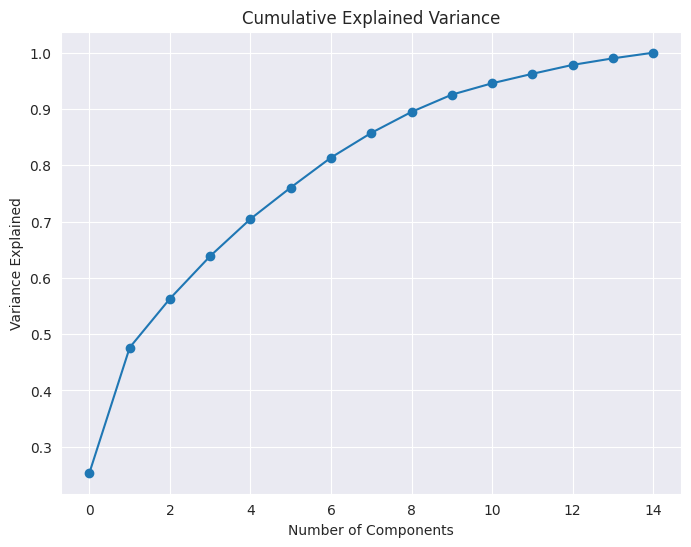

In [66]:
pca = CustomPCA()
pca.fit(df_scaled)
cumulative_variance = np.cumsum(pca.get_explained_variance_ratio())
print(cumulative_variance)

plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance , marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.show()


Build a new DataFrame with the first slected components. save it to a new CSV file named 'pca_output.csv'

In [67]:
#Build a new DataFrame with the first slected components
n_components = 6
pca_model =  CustomPCA(n_components=n_components)
pca_model.fit(df_scaled)
pca_output = pca_model.transform(df_scaled)
df_pca = pd.DataFrame(data=pca_output, columns=[f'PC{i+1}' for i in range(n_components)])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,1.728541,-0.833445,-0.384363,0.429897,-0.118070,-0.486503
1,0.312835,2.531537,0.615274,0.912451,-0.845063,-0.004857
2,-1.197318,-0.883804,-1.177909,-1.172951,-1.072885,1.898819
3,0.904752,0.002158,-0.236403,1.354837,-0.441498,0.780313
4,1.498611,-0.526780,-0.787691,0.088656,-0.275036,-0.367269


We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

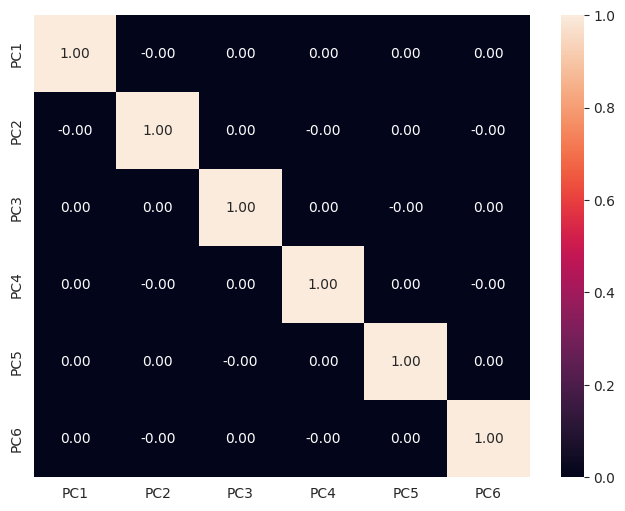

In [68]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_pca.corr(), annot=True, fmt=".2f")
plt.show()

## KMeans (45 points)
Implement kmeans from scratch.

In [98]:
import numpy as np
np.random.seed(42)

class CustomKMeans:
    def __init__(self, n_clusters=3, max_iter=100, random_state=42):
        """
        Initialize the KMeans class with the number of clusters and maximum iterations.
        n_clusters: Number of clusters to form.
        max_iter: Maximum number of iterations for convergence.
        random_state: Seed for reproducibility.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None  # To store the centroids of clusters
        self.inertia_ = None   # To store the inertia (within-cluster sum of squares)
        self.labels_ = None    # To store the label assigned to each data point (cluster assignment)

    def fit(self, X):
        """
        Fit the KMeans model on the dataset X.
        X: Input data (n_samples, n_features)
        """
        
        n_samples, n_features = X.shape
        random_indices = np.random.choice(n_samples, self.n_clusters , replace=False)
        self.centroids = X[random_indices]
        
        distances = np.zeros((self.n_clusters , n_samples))
        for _ in range(self.max_iter):
            for i in range(self.n_clusters):
                distances[i] = np.linalg.norm(X - self.centroids[i] , axis=1)
            self.labels_ = np.argmin(distances , axis=0)
            for i in range(self.n_clusters):
                self.centroids[i] = np.mean(X[self.labels_ == i] , axis=0)
        
        self.inertia_ = self._calculate_inertia(X)
        
        return self

    def _calculate_inertia(self, X):
        """
        Calculate the within-cluster sum of squared distances (inertia).
        X: Input data (n_samples, n_features)
        Returns: inertia (float)
        """
        # Step 1: For each cluster, compute the squared distances of points from their corresponding centroid
        # Step 2: Sum all squared distances to compute inertia
        inertia = 0.0
        for _ in range(self.n_clusters):
            inertia += np.sum((X[self.labels_ == _] - self.centroids[_])**2)
        return inertia


### Elbow Method
Apply the elbow method to determine the optimal number of clusters for K-Means. what is the best number of clusters?

In [99]:
# Initialize an empty list to store the WCSS values for each number of clusters
WCSS = []

# Apply KMeans for a range of cluster values (from 1 to 30)
for i in range(1, 30):
    # Initialize the CustomKMeans with `i` clusters and a random state of 42
    kmeans_pca = CustomKMeans(n_clusters=i, random_state=42)
    
    # Fit the model to the PCA-transformed data
    kmeans_pca.fit(pca_output)

    # Append the calculated inertia (WCSS) to the WCSS list
    WCSS.append(kmeans_pca.inertia_)

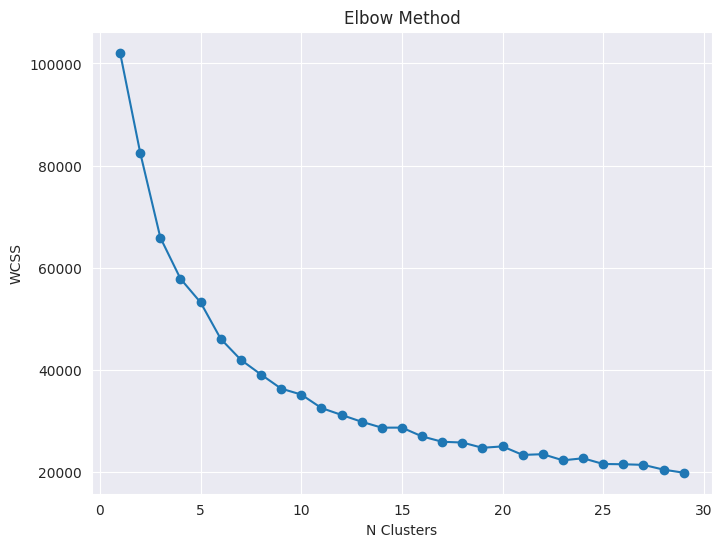

In [102]:
# Plot the Elbow curve using Matplotlib
plt.figure(figsize=(8, 6))
plt.plot(range(1, 30), WCSS, marker='o')
plt.title('Elbow Method')
plt.xlabel('N Clusters')
plt.ylabel('WCSS')
plt.show()

Apply the optimal KMeans clustering on the PCA-transformed data, and assign cluster labels to each observation. Add a new column named segment to the df_pca DataFrame to store these labels.

In [103]:
# Apply KMeans on PCA-reduced data with the optimal number of clusters based on the elbow method
#using elbow method we can see that the best number of clusters is 6
kmeans_pca = CustomKMeans(n_clusters=6, random_state=42)
kmeans_pca.fit(pca_output)



In [104]:
# Add a new column 'segment' to pca data frame and assign the cluster labels to each observation
df_pca['segment'] = kmeans_pca.labels_
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,segment
0,1.728541,-0.833445,-0.384363,0.429897,-0.118070,-0.486503,5
1,0.312835,2.531537,0.615274,0.912451,-0.845063,-0.004857,4
2,-1.197318,-0.883804,-1.177909,-1.172951,-1.072885,1.898819,2
3,0.904752,0.002158,-0.236403,1.354837,-0.441498,0.780313,5
4,1.498611,-0.526780,-0.787691,0.088656,-0.275036,-0.367269,5


 visualize the clustering by plotting the pairwise relationships of the PCA-reduced features, color-coded by the cluster assignments.

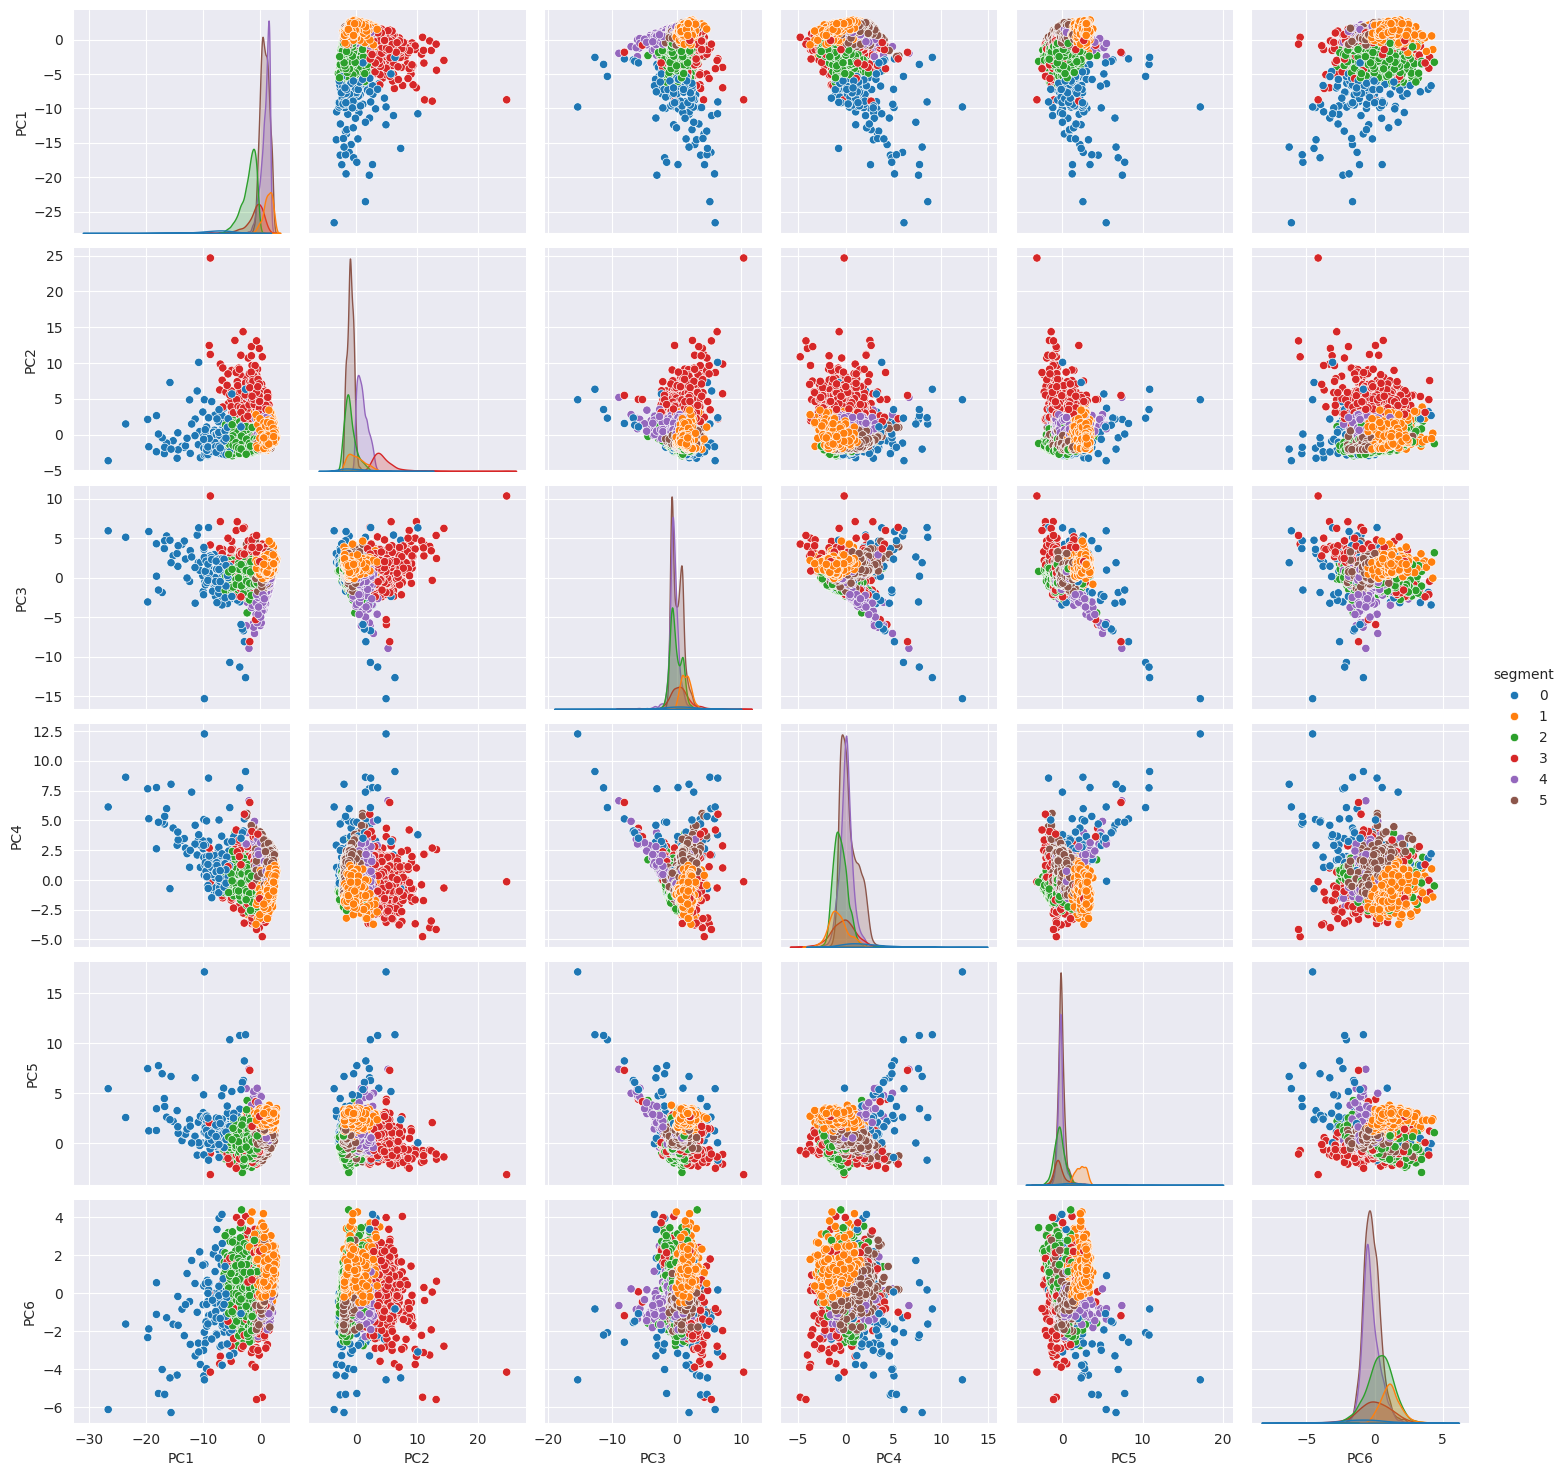

In [106]:

sns.pairplot(df_pca, hue='segment' , palette='tab10')
plt.show()

So, when we employ PCA prior to using K-means we can visually separate almost the entire data set. That was one of the biggest goals of PCA - to reduce the number of variables by combining them into bigger, more meaningful features.

### Hierarchical Clustering
Perform hierarchical clustering on the reduced dataset after PCA. Use complete linkage method.


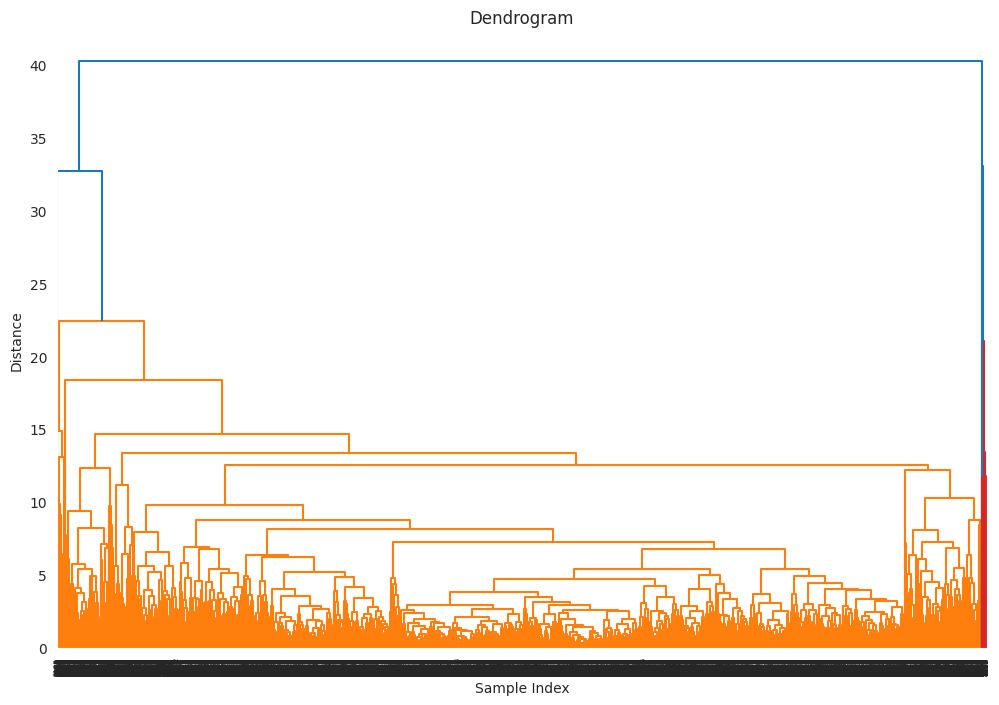

In [107]:
# Perform Hierarchical Clustering on the pca dataset

Z = linkage(pca_output, method='complete' )

# Visualize the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


"Use scipy.cluster.hierarchy.fcluster to assign clusters from the dendrogram with a specified number of 5 clusters. Then visualize the results using pairplots.

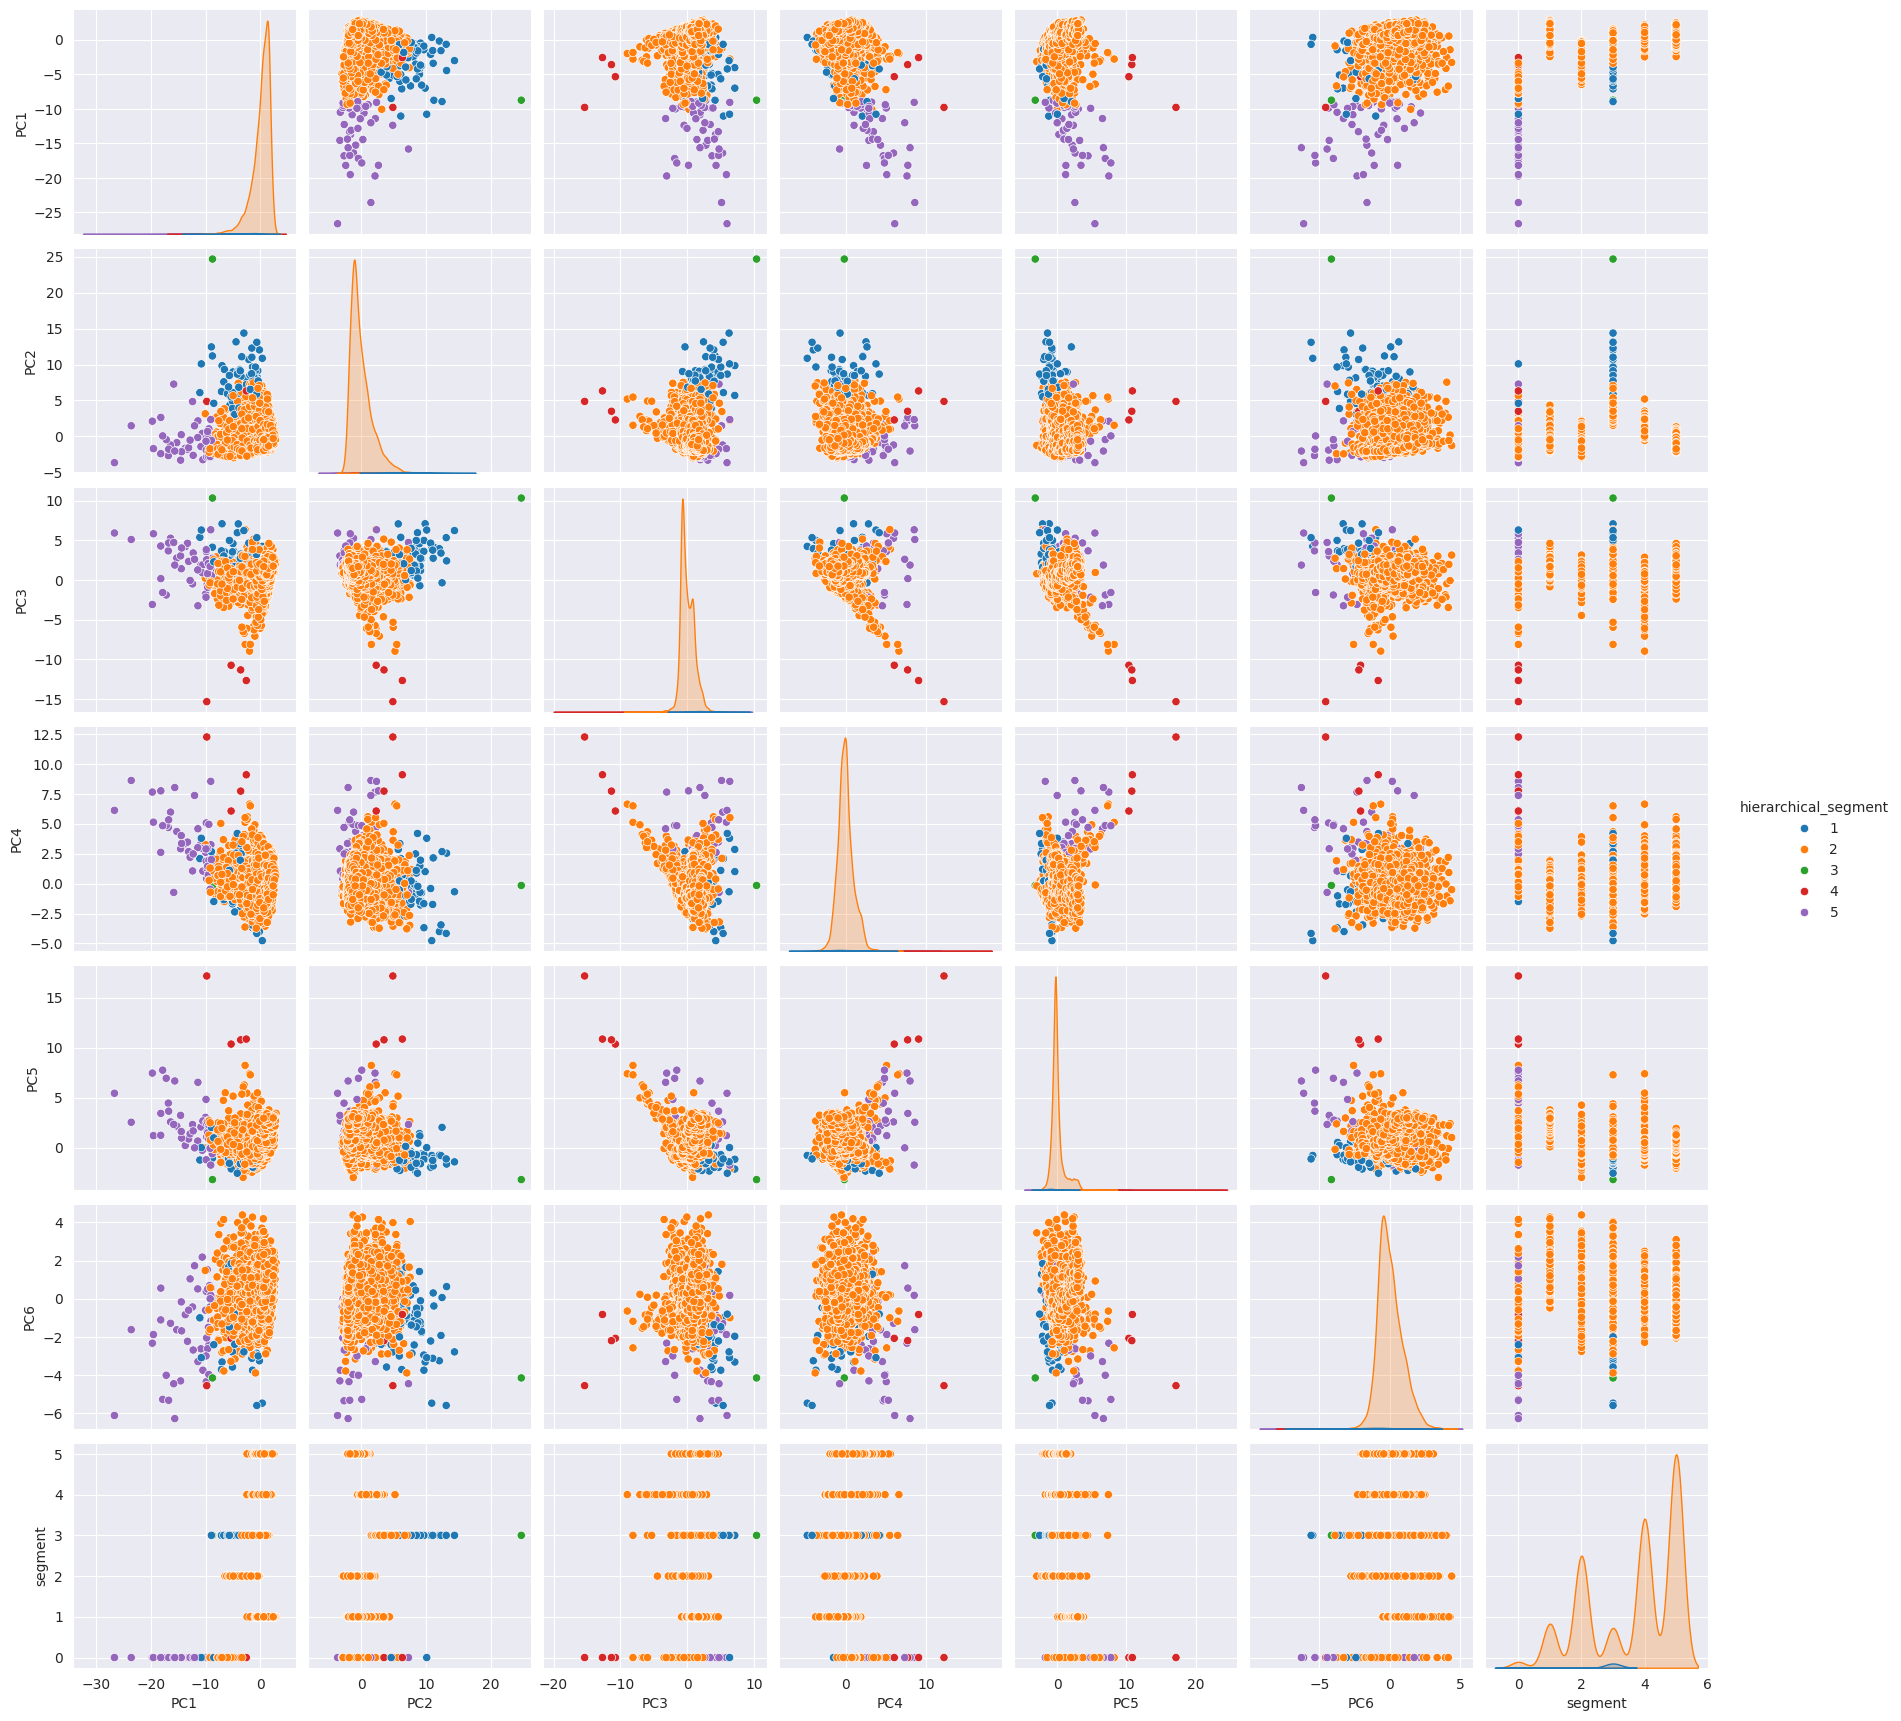

In [113]:
# Choose threshold and assign clusters

threshold = 22
clusters = fcluster(Z, threshold, criterion='distance')

# Assign cluster labels to PCA DataFrame
df_pca['hierarchical_segment'] = clusters


# Visualize using PCA components
sns.pairplot(df_pca, hue='hierarchical_segment', palette='tab10')
plt.show()